# Итоговое задание Ivan Stramyk по Проекту 6. Car Price prediction

## №1. Парсинг

##### Парсил объявления через колаб https://colab.research.google.com/drive/1UyKMfeF-DjK_gad25PEofaLhFir2b9uH?usp=sharing 
Код предоставляю ниже.
Список объявлений по маркам автомобилей состоянием на 02.04.2021

In [2]:
# Импорт используемых библиотек
import pandas as pd
import requests, json
import time
import traceback

In [ ]:
models_dict = {'AC':3,'AMC':4,'AURUS':10,'Acura':145,'Adler':4,'Alfa Romeo':145,'Alpina':10,'Ariel':1,'Aro':7,'Asia':7,'Aston Martin':20,'Auburn':1,'Audi':11130,'Austin':2,\
               'BAIC':2,'BMW':16647,'BYD':125,'Bentley':173,'Borgward':1,'Brabus':2,'Brilliance':94,'Bugatti':1,'Buick':44,'CHERYEXEED':78,'Cadillac':692,'Chana':1,'ChangFeng':3,\
               'Changan':484,'Changhe':2,'Chery':3429,'Chevrolet':12926,'Chrysler':650,'Citroen':2421,'DKW':1,'DS':5,'DW Hower':18,'Dacia':43,'Dadi':5,'Daewoo':4992,'Daihatsu':373,\
               'Daimler':1,'Datsun':1219,'Delage':1,'Derways':14,'Dodge':771,'DongFeng':51,'Doninvest':23,'Eagle':3,'FAW':277,'FSO':2,'Ferrari':29,'Fiat':909,'Fisker':1,'Ford':12124,\
               'Foton':10,'GAC':10,'GMC':45,'Geely':2060,'Genesis':83,'Geo':8,'Great Wall':900,'Hafei':47,'Haima':99,'Hanomag':1,'Haval':1339,'Hawtai':10,'Heinkel':1,'Honda':5698,\
               'HuangHai':2,'Hudson':1,'Hummer':162,'Hyundai':23231,'Infiniti':1935,'Iran Khodro':79,'Isuzu':149,'JAC':80,'Jaguar':717,'Jeep':937,'Jinbei':7,'Kia':20809,'LADA (ВАЗ)':77398,\
               'LTI':1,'Lamborghini':16,'Lancia':33,'Land Rover':3476,'Landwind':3,'Lexus':3932,'Lifan':2209,'Ligier':1,'Lincoln':186,'Luxgen':23,'MG':19,'MINI':1042,'Mahindra':4,'Marussia':1,\
               'Maruti':1,'Maserati':97,'Maybach':11,'Mazda':8327,'McLaren':3,'Mercedes-Benz':21671,'Mercury':37,'Metrocab':1,'Mitsubishi':11276,'Mitsuoka':4,'Nissan':19415,'Oldsmobile':16,\
               'Opel':9582,'PUCH':7,'Packard':1,'Peugeot':4462,'Plymouth':21,'Pontiac':113,'Porsche':1590,'Proton':12,'RAM':32,'Ravon':291,'Renault':19025,'Renault Samsung':2,'Rolls-Royce':57,\
               'Rover':222,'SEAT':214,'Saab':271,'Saturn':33,'Scion':19,'Shanghai Maple':8,'ShuangHuan':2,'Simca':1,'Skoda':9601,'Smart':165,'SsangYong':1840,'Subaru':2436,'Suzuki':2940,'TATA':4,\
               'Talbot':1,'Tatra':4,'Tesla':152,'Tianma':2,'Tianye':10,'Toyota':24191,'Trabant':4,'Triumph':3,'Vauxhall':1,'Volkswagen':19792,'Volvo':3346,'Vortex':395,'Wanderer':5,'Wartburg':3,\
               'Willys':13,'Xin Kai':3,'Yulon':1,'ZX':15,'Zibar':1,'Zotye':85,'Автокам':1,'ГАЗ':4318,'Гоночный автомобиль':6,'ЗАЗ':1380,'ЗИЛ':7,'ЗиС':3,'ИЖ':626,'Канонир':1,'ЛуАЗ':299,'Москвич':671,\
               'СМЗ':21,'ТагАЗ':189,'УАЗ':5713}

In [ ]:
# уберем модели с кол-вом объявлений ниже 300 и повысим регистр индексов 
list_keys_to_delete = []
for mark in models_dict.keys():
    if models_dict[mark] < 300:
        list_keys_to_delete.append(mark)
    
for key in list_keys_to_delete: del models_dict[key]

for mark in list(models_dict.keys()):
    mark_up = mark.upper()
    models_dict[mark_up]=models_dict.pop(mark)

In [ ]:
# Удалим отечественные модели
for key in ['LADA (ВАЗ)','ГАЗ','УАЗ', 'ЗАЗ', 'ИЖ', 'МОСКВИЧ']: del models_dict[key]

In [ ]:
# исправим некоторые названия
models_dict['GREAT_WALL']=models_dict.pop('GREAT WALL')
models_dict['LAND_ROVER']=models_dict.pop('LAND ROVER')
models_dict['MERCEDES']=models_dict.pop('MERCEDES-BENZ')
models_dict['SSANG_YONG']=models_dict.pop('SSANGYONG')

In [ ]:
# словарь с названиями моделей и количеством объявлений после фильтрации

models_dict = {'AUDI': 11130,  'BMW': 16647,  'CADILLAC': 692,  'CHANGAN': 484,  'CHERY': 3429,  'CHEVROLET': 12926,  'CHRYSLER': 650,  'CITROEN': 2421,
 'DAEWOO': 4992,  'DAIHATSU': 373,  'DATSUN': 1219,  'DODGE': 771,  'FIAT': 909,  'FORD': 12124,  'GEELY': 2060,  'HAVAL': 1339,  'HONDA': 5698,
 'HYUNDAI': 23231,  'INFINITI': 1935,  'JAGUAR': 717,  'JEEP': 937,  'KIA': 20809,  'LEXUS': 3932,  'LIFAN': 2209,  'MINI': 1042,  'MAZDA': 8327,
 'MITSUBISHI': 11276,  'NISSAN': 19415,  'OPEL': 9582,  'PEUGEOT': 4462,  'PORSCHE': 1590,  'RENAULT': 19025,  'SKODA': 9601,  'SUBARU': 2436, 
 'SUZUKI': 2940,  'TOYOTA': 24191,  'VOLKSWAGEN': 19792,  'VOLVO': 3346,  'VORTEX': 395,  'GREAT_WALL': 900,  'LAND_ROVER': 3476, 'MERCEDES': 21671,
 'SSANG_YONG': 1840}

### Парсить будем методом POST через JSON так как это довольно быстро и удобно.

In [ ]:
# headers нашей сессии в браузере
HEADERS = {
    'Accept': '*/*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3',
    'Connection': 'keep-alive',
    'Content-Length':'103',
    'content-type':'application/json',
    'Cookie':'autoru_gdpr=1; _csrf_token=0b9bfe638dd0b95a7c3ac9b3fd59d540eae8102094150176; autoru_sid=a%3Ag60697fdd20d5osjl7hjk5o65qso5f3m.bbec9e47fe6c357861dac8894dd324be%7C1617526749509.604800.Rmi4CAt4gY8VoAVCNf8yGA.WhKyb55vGRLnuhVwmAYw-WpbpGJhnU11ZIgNnQ0xwlQ; autoruuid=g60697fdd20d5osjl7hjk5o65qso5f3m.bbec9e47fe6c357861dac8894dd324be; suid=8b392ef0642f31eba6e490553b2a8876.aa730c703f9c9a4f5e66993fe8c916ea; from_lifetime=1617559952775; from=direct; yuidlt=1; yandexuid=8768961311617526753; cmtchd=MTYxNzUyNjc2MDU5Ng==; gdpr=0; cycada=p92JQFOQLJpa73XwSOM/xy61EE8dGReKfzAjoY3mt3A=; _ym_uid=1617526759299819712; _ym_d=1617559952; _ym_isad=2; mindboxDeviceUUID=ab564749-0f98-40b1-89d2-41b766a1c42d; directCrm-session=%7B%22deviceGuid%22%3A%22ab564749-0f98-40b1-89d2-41b766a1c42d%22%7D; _ga=GA1.2.1029486733.1617532156; _gid=GA1.2.1469364259.1617532156; tmr_reqNum=3; tmr_lvid=bf1506bfca36781b64ee3b80ce17ae53; tmr_lvidTS=1617532156060; X-Vertis-DC=vla',
    'Host': 'auto.ru',
    'Origin':'https://auto.ru',
    'Referer':'https://auto.ru/',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:87.0) Gecko/20100101 Firefox/87.0',
    'x-client-app-version':'5f535b6dbd',
    'x-client-date':'1617559954352',
    'x-csrf-token':'0b9bfe638dd0b95a7c3ac9b3fd59d540eae8102094150176',
    'x-page-request-id':'52e324b5b6813d1a9c9635b956cb5b85',
    'x-requested-with':'fetch'
}

In [ ]:
url = 'https://auto.ru/-/ajax/desktop/listing/' # урл на который отправляем запрос

df_list = [] # список для упаковки спаршенной информации
page_dict = {} # словарь для записи моделей и страниц, на которых парсер остановился

for pages in range(1,100): # всего сайт показывает 99 страниц - проходимся по каждой странице
    for model in models_dict: # проходимся по каждой модели из словаря
        if models_dict[model] > (pages * 37): # проверяем есть ли вообще столько страниц по этой модели
            time.sleep(1) # задержка между запросами, чтобы не блокировали наш IP
            param = {"catalog_filter":[{"mark":model}],"section":"all","category":"cars", "page": pages} # параметры запроса
            try:
                response = requests.post(url, data=json.dumps(param), headers = HEADERS) # запрашиваем данные
                data = response.json()
                if data['status'] == 'SUCCESS': # в случае успеха добавляем в наш список всю информацию по каждому объявлению отдельно
                    for elem in data['offers']:
                        try:
                            df_list.append(elem)
                        except:
                            print(df_list)
                        page_dict.update({model: pages}) # обновляем словарь со значением модели и страницы, которая была обработана   
                    # сохраняем в отдельный файл после каждого успешного цикла
                    pd.DataFrame([page_dict]).to_csv(r'pars_models.csv', index=False) # а также файл с названиями моделей и страниц, где парсер остановился
            except:
                print(data['status']) # в случае неудачи смотрим на статус
                print(model,pages, traceback.format_exc()) # а также на модель, страницу и суть ошибки

pd.DataFrame(df_list).to_csv(r'autoru.csv', index=False) # сохраняем всё в файл (по факту делал в три итерации)
!cp autoru.csv "/content/drive/My Drive/Data Science/SF/auto.ru/" # дополнительно копируем файл к себе в гугл диск

## №2. Обрабатываем данные - формируем датафрейм с самыми необходимыми параметрами

In [ ]:
df_t = pd.DataFrame(df_list) # создаем датафрейм из полученных спаршенных данных
df_t = df_t.drop_duplicates(subset=['id']) # удаляем дубликаты

In [ ]:
# создаем новый датафрейм с самыми необходимыми параметрами
df_tnew = pd.DataFrame()

df_tnew['bodyType'] = ''
df_tnew['brand'] = ''
df_tnew['color'] = df_t['color_hex']
df_tnew['complectation_dict'] = ''
df_tnew['description'] = df_t['description']
df_tnew['engineDisplacement'] = ''
df_tnew['enginePower'] = ''
df_tnew['equipment_dict'] = ''
df_tnew['fuelType'] = ''
df_tnew['mileage'] = ''
df_tnew['modelDate'] = ''
df_tnew['model_info'] = ''
df_tnew['model_name'] = ''
df_tnew['name'] = ''
df_tnew['numberOfDoors'] = ''
df_tnew['priceCurrency'] = 'RUB'
df_tnew['productionDate'] = ''
df_tnew['sell_id'] = df_t['saleId']
df_tnew['super_gen'] = ''
df_tnew['vehicleConfiguration'] = ''
df_tnew['vehicleTransmission'] = ''
df_tnew['vendor'] = ''
df_tnew['Владельцы'] = ''
df_tnew['ПТС'] = ''
df_tnew['Привод'] = ''
df_tnew['Руль'] = ''
df_tnew['id'] = df_t['id']
df_tnew['price'] = ''

Пишем функции, которые распарсят наши данные с формата JSON в удобный для нас табличный вид. Нужно сделать такие же столбцы как в test.csv, но с добавлений цены и id объявления для удаления дубликатов.

In [ ]:
def first_level(df, new_df, column, parametr, new_parametr):
    iterator = 0
    for x in df[column]:
        if x is not None:
            try:
                new_df[new_parametr][iterator] = eval(x)[parametr]
            except:
                new_df[new_parametr][iterator] = ''
        iterator += 1
        
def second_level(df, new_df, column, parametr_1, parametr_2, new_parametr):
    iterator = 0
    for x in df[column]:
        if x is not None:
            try:
                new_df[new_parametr][iterator] = eval(x)[parametr_1][parametr_2]
            except:
                new_df[new_parametr][iterator] = ''
        iterator += 1

Выполняем под каждый параметр определенную функцию.

In [ ]:
first_level(df_t, df_tnew, 'vehicle_info', 'complectation', 'complectation_dict')
first_level(df_t, df_tnew, 'vehicle_info', 'equipment', 'equipment_dict')
first_level(df_t, df_tnew, 'state', 'mileage', 'mileage')
first_level(df_t, df_tnew, 'vehicle_info', 'model_info', 'model_info')
first_level(df_t, df_tnew, 'documents', 'year', 'productionDate')
first_level(df_t, df_tnew, 'vehicle_info', 'tech_param', 'super_gen')
first_level(df_t, df_tnew, 'vehicle_info', 'vendor', 'vendor')
first_level(df_t, df_tnew, 'documents', 'owners_number', 'Владельцы')
first_level(df_t, df_tnew, 'documents', 'pts', 'ПТС')
first_level(df_t, df_tnew, 'vehicle_info', 'steering_wheel', 'Руль')
first_level(df_t, df_tnew, 'price_info', 'price', 'price')
second_level(df_t, df_tnew, 'vehicle_info', 'configuration', 'human_name', 'bodyType')
second_level(df_t, df_tnew, 'vehicle_info', 'mark_info', 'code', 'brand')
second_level(df_t, df_tnew, 'vehicle_info', 'tech_param', 'human_name', 'engineDisplacement')
second_level(df_t, df_tnew, 'vehicle_info', 'tech_param', 'power', 'enginePower')
second_level(df_t, df_tnew, 'vehicle_info', 'super_gen', 'year_from', 'modelDate')
second_level(df_t, df_tnew, 'vehicle_info', 'model_info', 'code', 'model_name')
second_level(df_t, df_tnew, 'vehicle_info', 'tech_param', 'human_name', 'name')
second_level(df_t, df_tnew, 'vehicle_info', 'configuration', 'doors_count', 'numberOfDoors')
second_level(df_t, df_tnew, 'vehicle_info', 'tech_param', 'transmission', 'vehicleTransmission')

In [ ]:
# пара ручных обработок для необычных методов обработки параметров

iterator = 0
for x in df_t['lk_summary']:
    if x is not None:        
        try:
            df_tnew['fuelType'][iterator] = x.split(' ')[-1]
        except:
            df_tnew['fuelType'][iterator] = ''
    iterator += 1
    
iterator = 0
for x in df_t['lk_summary']:
    if x is not None:        
        try:
            df_tnew['Привод'][iterator] = x.split(' ')[-2][:-1]
        except:
            df_tnew['Привод'][iterator] = ''
    iterator += 1

iterator = 0
for x in df_tnew['engineDisplacement']:    
    df_tnew['engineDisplacement'][iterator] = str(x[:3]) + ' LTR'
    iterator += 1
    
iterator = 0
for x in df_tnew['enginePower']:
    df_tnew['enginePower'][iterator] = str(x) + ' N12'
    iterator += 1

iterator = 0
for x in df_tnew['sell_id']:
    df_tnew['sell_id'][iterator] = str(x[:10])
    iterator += 1
    
iterator = 0
for x in df_t['vehicle_info']:
    if x is not None:
        try:
            df_tnew['vehicleConfiguration'][iterator] = \
            eval(x)['configuration']['body_type'] + ' ' + \
            eval(x)['tech_param']['transmission'] + ' ' + \
            eval(x)['tech_param']['human_name'][:3]
        except:
            df_tnew['vehicleConfiguration'][iterator] = ''
    iterator += 1

In [ ]:
# исправляем название цветов
color_dict = {'040001' : 'чёрный', 'FAFBFB' : 'белый', '97948F' : 'серый', 'CACECB' : 'серебристый', '0000CC' : 'синий', 'EE1D19' : 'красный', \
              '200204' : 'коричневый', '007F00' : 'зелёный', 'C49648' : 'бежевый', '22A0F8' : 'голубой', 'DEA522' : 'золотистый', '660099' : 'пурпурный', \
              'FF8649' : 'оранжевый', '4A2197' : 'фиолетовый', 'FFD600' : 'жёлтый', 'FFC0CB' : 'розовый'}

iterator = 0
for x in df_tnew['color']:
    df_tnew['color'][iterator] = color_dict[x]    
    iterator += 1

In [ ]:
len(df_tnew)

В общем не плохо. Получилось спарсить таким образом 167 398 объявлений.Если поиграться с параметрами запроса (вводить разные модели, количество дней с появления объвления и другие), то за недельку можно собрать приличный датасет для анализа.

In [ ]:
df_tnew.to_csv('train.csv') # сохраням наш финальный датафрейм в файл

## №3. Подготовка данных и обучение

In [1]:
import numpy as np # linear algebra
import sys
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor

import warnings
#warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re

In [3]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)

Python       : 3.7.9 | packaged by conda-forge | (default, Feb 13 2021, 20:03:11) 
Numpy        : 1.19.5


In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [5]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

# Setup

In [414]:
VERSION    = 1
DIR_TRAIN  = '../input/autoru/' # подключил к ноутбуку свой внешний датасет
DIR_TEST   = '../input/sf-dst-car-price-prediction/'
VAL_SIZE   = 0.33   # 33%
N_FOLDS    = 5

# CATBOOST
ITERATIONS = 2000
LR         = 0.1

# Data

In [7]:
!ls ../input/

autoru	sf-dst-car-price-prediction


In [375]:
train = pd.read_csv(DIR_TRAIN+'train.csv') # мой подготовленный датасет для обучения модели
test = pd.read_csv(DIR_TEST+'test.csv')
sample_submission = pd.read_csv(DIR_TEST+'sample_submission.csv')

In [281]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

In [282]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167398 entries, 0 to 167397
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   bodyType              167394 non-null  object 
 1   brand                 167398 non-null  object 
 2   color                 167398 non-null  object 
 3   complectation_dict    167398 non-null  object 
 4   description           162315 non-null  object 
 5   engineDisplacement    167398 non-null  object 
 6   enginePower           167398 non-null  object 
 7   equipment_dict        167398 non-null  object 
 8   fuelType              167398 non-null  object 
 9   mileage               167398 non-null  int64  
 10  modelDate             167394 non-null  float64
 11  model_info            167398 non-null  object 
 12  model_name            167398 non-null  object 
 13  name                  167394 non-null  object 
 14  numberOfDoors         167394 non-null  float64
 15  

## Data Preprocessing

In [376]:
# убираем не нужные для модели признаки
test.drop(['Таможня', 'Состояние', 'car_url', 'image', 'parsing_unixtime', 'Владение', 'priceCurrency'], axis=1, inplace=True,)
train.drop(['id', 'priceCurrency'], axis=1, inplace=True,)

# убираем признаки которые еще не успели обработать,     
test.drop(['description', 'complectation_dict', 'equipment_dict', 'super_gen', 'model_info'], axis=1, inplace=True,)
train.drop(['description', 'complectation_dict', 'equipment_dict', 'super_gen', 'model_info'], axis=1, inplace=True,)

In [71]:
# проверяем на пустые значения
test.isna().sum()

bodyType                0
brand                   0
color                   0
engineDisplacement      0
enginePower             0
fuelType                0
mileage                 0
modelDate               0
model_name              0
name                    0
numberOfDoors           0
productionDate          0
sell_id                 0
vehicleConfiguration    0
vehicleTransmission     0
vendor                  0
Владельцы               0
ПТС                     1
Привод                  0
Руль                    0
dtype: int64

In [ ]:
# смотрим самые популярные значения
test['ПТС'].value_counts()

In [110]:
# заполняем самым популярным значением пропущенные значения
test['ПТС'] = test['ПТС'].fillna(test['ПТС'].value_counts().index[0])

In [ ]:
# проверяем пустые значения
train.isna().sum()

#### Среди владельцев нету сильно популярного значения, но пропусков очень много - 17 тыс. это около 13%, поэтому лучше заполним пропуски нулями. Таким образом создадим ещё одно состояние для этого категориального признака.

In [ ]:
train['Владельцы'].value_counts() # проверяем уникальные значения владельцев.

In [111]:
train['Владельцы'] = train['Владельцы'].fillna(0) # заполняем нулями пропуски

Переводим Владельцы в строку, так как по сути это категориальный признак

In [128]:
train['Владельцы'] = train['Владельцы'].astype('str')
train['numberOfDoors'] = train['numberOfDoors'].astype('str')

#### В остальных случаях либо удаляем, либо заполняем самыми популярными значениями.

In [113]:
iterator = 0
for x in train.isna().sum():
    col = train.isna().sum().index[iterator] # формируем название столбца
    if x < 200:
        train = train.dropna(subset=[col]) # всё что меньше 200 пропусков - удаляем всю строку
    else:
        train[col] = train[col].fillna(train[col].value_counts().index[0]) # где больше 200 пропусков - заполняем ячейки самыми популярными значениями
    iterator += 1

Исследуем наши числовые признаки.

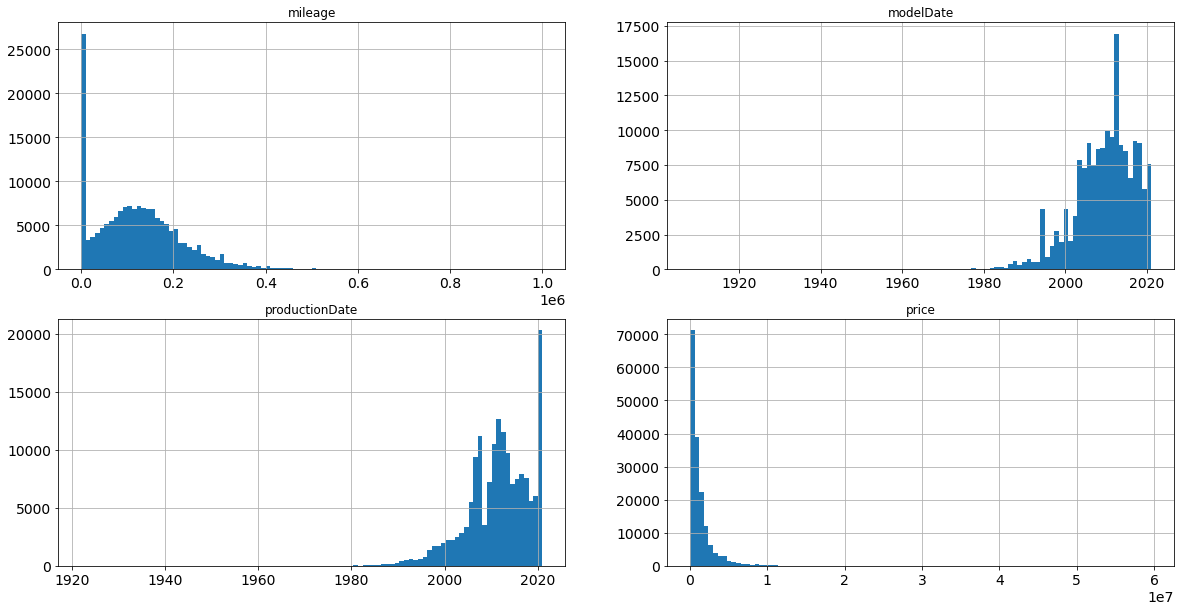

In [114]:
num_cols = ['mileage', 'modelDate', 'productionDate', 'price']

# посмотрим на распределение числовых данных
plt.figure(figsize=(20, 10))
iterator = 1
for i in num_cols:
    plt.subplot(2, 2, iterator)
    train[i].hist(bins=100)
    plt.title(i)
    iterator += 1

Видим явные перекосы. Посмотрим подробнее. 

In [16]:
for x in num_cols:
    print(train[x].value_counts())

0         23603
200000     2087
150000     1923
250000     1480
180000     1407
          ...  
42691         1
65224         1
9939          1
18143         1
6141          1
Name: mileage, Length: 26985, dtype: int64
2010.0    9905
2011.0    9521
2017.0    9256
2012.0    9247
2018.0    9107
          ... 
1960.0       2
1937.0       2
1942.0       1
1957.0       1
1958.0       1
Name: modelDate, Length: 77, dtype: int64
2021    20269
2012    12608
2013    11525
2008    11151
2011    10515
        ...  
1956        1
1943        1
1961        1
1967        1
1975        1
Name: productionDate, Length: 77, dtype: int64
350000      1632
250000      1556
450000      1524
550000      1364
300000      1263
            ... 
2827000        1
4654900        1
271000         1
12346000       1
298990         1
Name: price, Length: 10624, dtype: int64


Видим много нулевых значений в mileage. Крайне малое количество очень старых моделей и несколько крайне редких значений цены. 
По скольку в mileage распределение достаточно нормальное, с небольшим смещением, заполним нулевые значения средним значением по выборке.
В modelDate и productionDate - удалим крайне старые модели.
В price удалим крайне дорогие модели.

In [115]:
train.loc[train['mileage'] == 0, 'mileage'] = train[train['mileage'] > 0]['mileage'].mean()

In [116]:
# функция удаления выбросов
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [117]:
# применяем функцию
train = remove_outlier(train, 'modelDate')
train = remove_outlier(train, 'productionDate')
train = remove_outlier(train, 'price')
train = remove_outlier(train, 'mileage')
train = train.reset_index(drop=True)

In [118]:
len(train)

145608

Чутка подсократили датасет, но количество выбросов по численных признаках явно стало меньше.

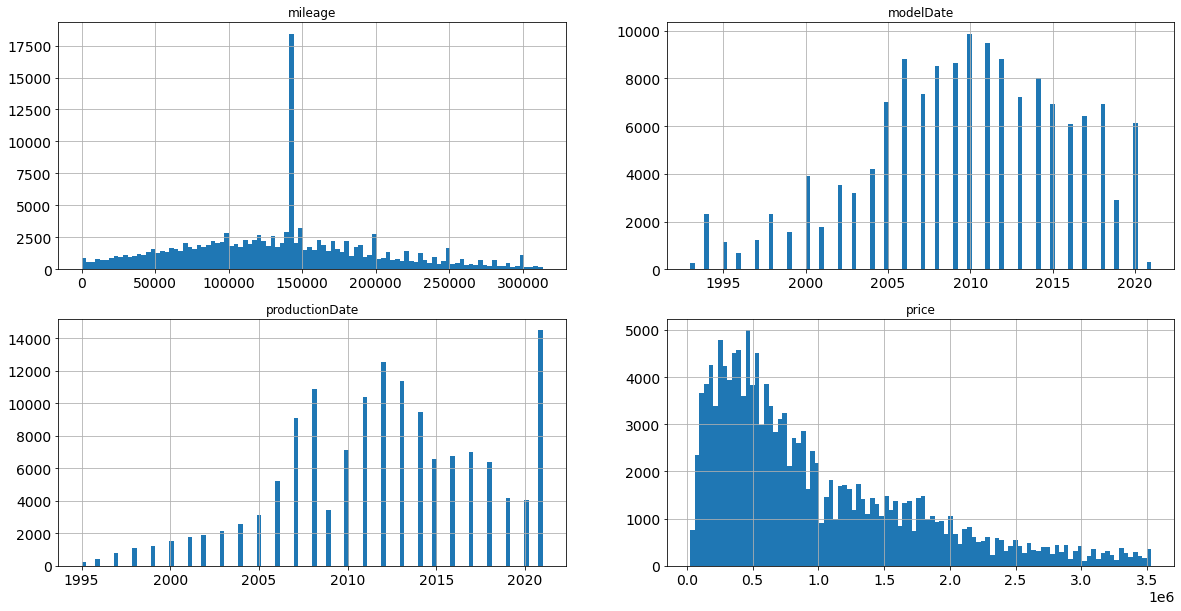

In [119]:
num_cols = ['mileage', 'modelDate', 'productionDate', 'price']

# посмотрим на распределение числовых данных
plt.figure(figsize=(20, 10))
iterator = 1
for i in num_cols:
    plt.subplot(2, 2, iterator)
    train[i].hist(bins=100)
    plt.title(i)
    iterator += 1

Смотрим на корреляцию, предполагая что дата выхода модели и производства автомобиля будет очень близка и сильно коррелировать между собой.

<AxesSubplot:>

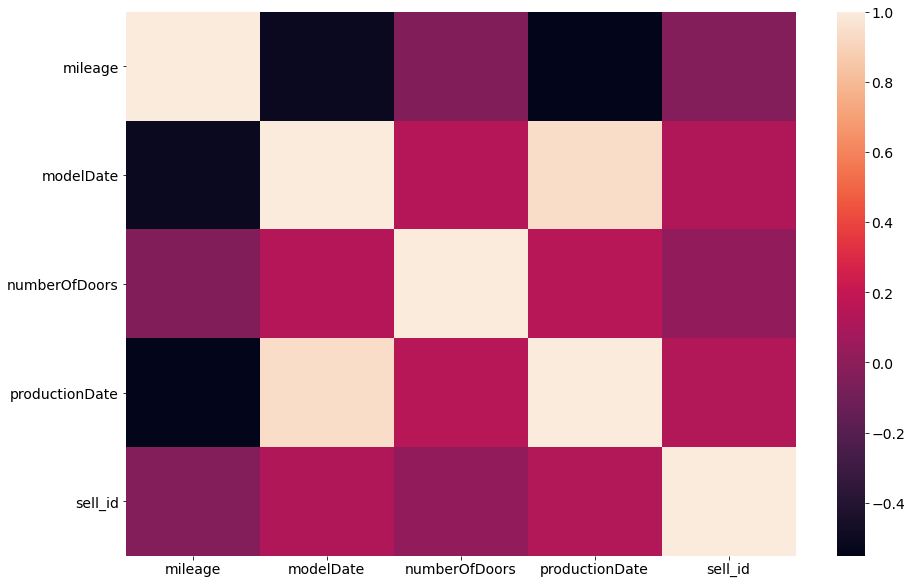

In [120]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(train.drop(['price', 'Владельцы'], axis=1).corr(),)

Ожидаемо, что productionDate и modelDate сильно коррелируют, но пока не будем удалять какую-то из них, так как регрессия лучше учится на обеих, чем на каждой по отдельности.
Сделаем пока пару OneHot признаков.

In [23]:
train_LR = train.copy()

In [25]:
train_LR = train_LR[train_LR['bodyType'].isin(train_LR['bodyType'].value_counts()[:10].index)]
train_LR = train_LR.reset_index(drop=True)

In [24]:
train_LR = pd.get_dummies(train_LR, columns=['Владельцы', 'brand', 'vendor', 'bodyType'])

<AxesSubplot:>

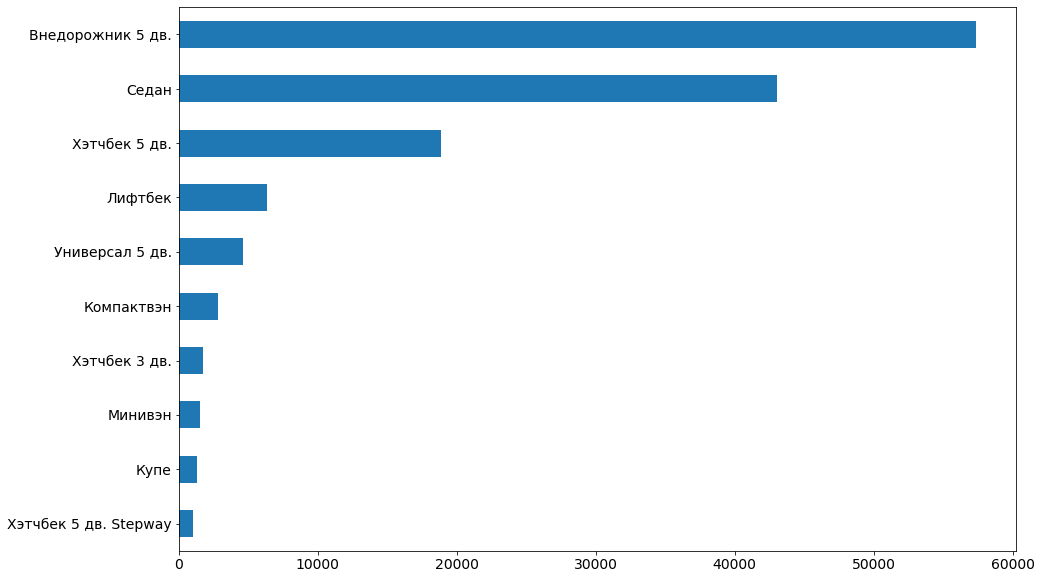

In [157]:
train['bodyType'].value_counts(ascending=True).plot(kind='barh')

In [148]:
# сократим мало популярные варианты bodyType
train = train[train['bodyType'].isin(train['bodyType'].value_counts()[:10].index)]
train = train.reset_index(drop=True)

<AxesSubplot:>

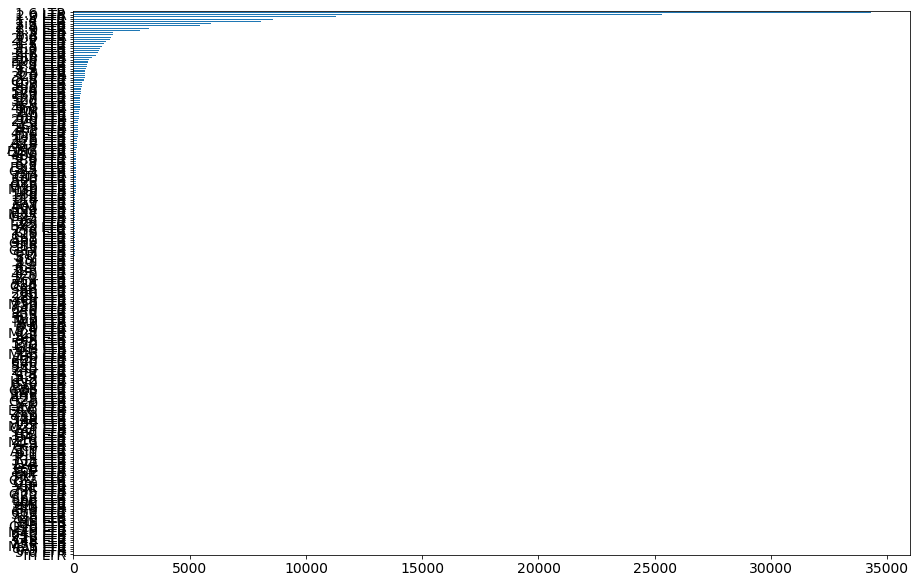

In [162]:
# есть явные мелкие значения, которые можно сократить
train['engineDisplacement'].value_counts(ascending=True).plot(kind='barh')

In [195]:
# из-за ошибок попадаются не верные числа, а также есть не нужная приставка LTR - исправим это и сократим список этого категориального признака
for index, value in enumerate(train['engineDisplacement']):
    train['engineDisplacement'][index] = re.sub(r'(\d).*(\d)(\D*)', '\\1.\\2', value)

In [196]:
# сократим мало популярные варианты engineDisplacement
train = train[train['engineDisplacement'].isin(train['engineDisplacement'].value_counts()[:30].index)]
train = train.reset_index(drop=True)

In [209]:
# попробуем перевести engineDisplacement в числовой признак
train['engineDisplacement'].value_counts().index

Index(['1.6', '2.0', '1.5', '1.4', '1.8', '3.0', '2.5', '2.4', '1.3', '1.2',
       '0.8', '3.5', '2.2', '1.7', '4.0', '2.3', '5.0', '3.6', '2.7',
       'Ste LTR', '1.0', 'FX3 LTR', '1.9', '4.4', '3.2', '2.8', '6-s LTR',
       'Coo LTR', '0.7', 'Sup LTR'],
      dtype='object')

In [210]:
engineDisplacement_list = ['1.6', '2.0', '1.5', '1.4', '1.8', '3.0', '2.5', '2.4', '1.3', '1.2', '0.8', '3.5', '2.2', '1.7', '4.0', '2.3', '5.0', '3.6', '2.7', \
                           '1.0', '1.9', '4.4', '3.2', '2.8', '0.7']

In [212]:
train = train[train['engineDisplacement'].isin(engineDisplacement_list)]
train = train.reset_index(drop=True)

In [217]:
# из-за ошибок попадаются не верные числа, а также есть не нужная приставка LTR - исправим это и сократим список этого категориального признака
for index, value in enumerate(train['engineDisplacement']):
    train['engineDisplacement'][index] = re.sub(r'(\d).*(\d)', '\\1\\2', value)

<AxesSubplot:>

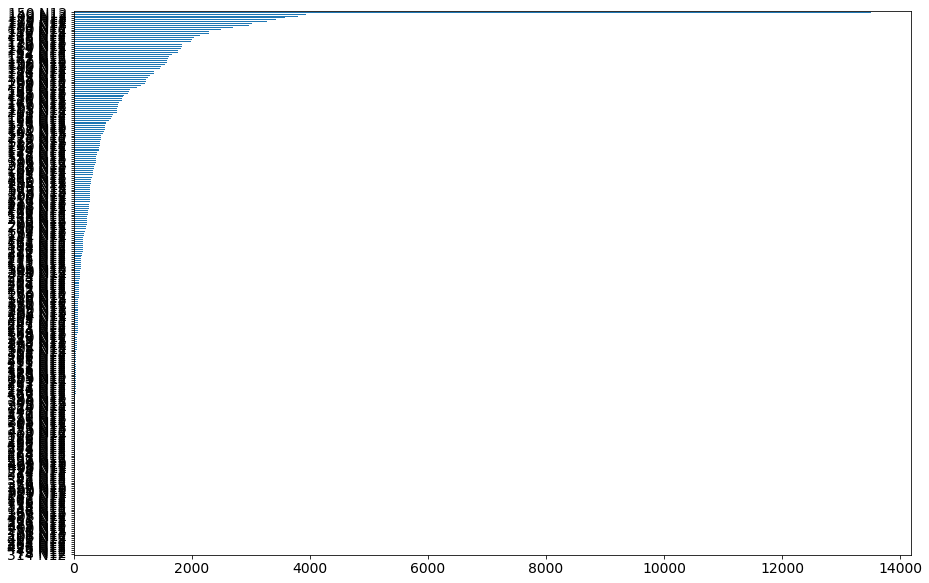

In [203]:
# есть явные мелкие значения, которые можно сократить
train['enginePower'].value_counts(ascending=True).plot(kind='barh')

In [225]:
# сделаем из этого признака тоже числовой
for index, value in enumerate(train['enginePower']):
    train['enginePower'][index] = re.sub(r'(\d*)\s(12)$', '\\1', value)

<AxesSubplot:>

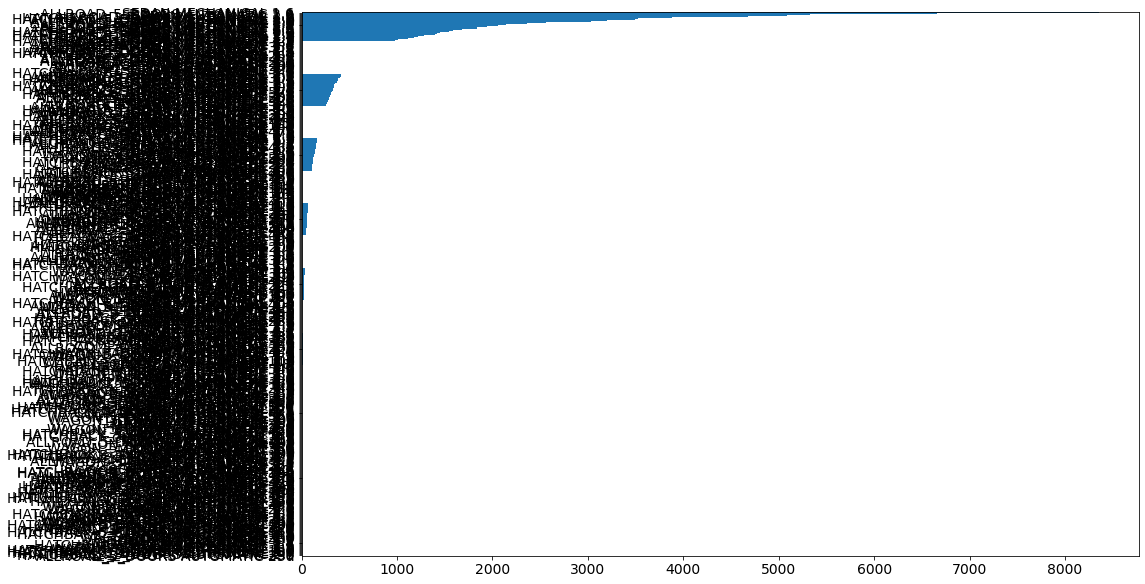

In [264]:
# есть явные мелкие значения, которые можно сократить
train['vehicleConfiguration'].value_counts(ascending=True).plot(kind='barh')

In [262]:
train['vehicleConfiguration'].value_counts()[:200].sum()

123269

In [265]:
# сократим мало популярные варианты engineDisplacement
train = train[train['vehicleConfiguration'].isin(train['vehicleConfiguration'].value_counts()[:200].index)]
train = train.reset_index(drop=True)

In [268]:
# Переводим признаки из float в int (иначе catboost выдает ошибку)
train_preproc = train.copy()
for feature in ['mileage', 'modelDate', 'productionDate', 'engineDisplacement', 'enginePower']:
    train_preproc[feature]=train_preproc[feature].astype('int32')
    
X_sub = test.copy()
for feature in ['mileage', 'modelDate', 'productionDate']:
    X_sub[feature]=X_sub[feature].astype('int32')

In [379]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()    
        
    # ################### Feature Engineering ####################################################
    # тут ваш код на генерацию новых фитчей
    
    # заполняем самым популярным значением пропущенные значения
    df_output['ПТС'] = df_output['ПТС'].fillna(df_output['ПТС'].value_counts().index[0])

    df_output['Владельцы'] = df_output['Владельцы'].fillna(0) # заполняем нулями пропуски

    df_output['Владельцы'] = df_output['Владельцы'].astype('str')
    df_output['numberOfDoors'] = df_output['numberOfDoors'].astype('str')

    iterator = 0
    for x in df_output.isna().sum():
        col = df_output.isna().sum().index[iterator] # формируем название столбца
        if x < 200:
            df_output = df_output.dropna(subset=[col]) # всё что меньше 200 пропусков - удаляем всю строку
        else:
            df_output[col] = df_output[col].fillna(df_output[col].value_counts().index[0]) # где больше 200 пропусков - заполняем ячейки самыми популярными значениями
        iterator += 1
    
    # заполняем пропуски средним значением
    df_output.loc[df_output['mileage'] == 0, 'mileage'] = df_output[df_output['mileage'] > 0]['mileage'].mean()

    # функция удаления выбросов
    def remove_outlier(df_in, col_name):
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
        return df_out

    # применяем функцию
    df_output = remove_outlier(df_output, 'modelDate')
    df_output = remove_outlier(df_output, 'productionDate')
    try:
        df_output = remove_outlier(df_output, 'price')
    except:
        df_output = df_output
    df_output = remove_outlier(df_output, 'mileage')
    df_output = df_output.reset_index(drop=True)

    # сократим мало популярные варианты bodyType
    df_output = df_output[df_output['bodyType'].isin(df_output['bodyType'].value_counts()[:10].index)]
    df_output = df_output.reset_index(drop=True)
    
    # сделаем из этого признака тоже числовой
    for index, value in enumerate(df_output['enginePower']):
        df_output['enginePower'][index] = re.sub(r'(\d*).*(12)$', '\\1', value)

    # сократим мало популярные варианты vehicleConfiguration
    df_output = df_output[df_output['vehicleConfiguration'].isin(df_output['vehicleConfiguration'].value_counts()[:200].index)]
    df_output = df_output.reset_index(drop=True)
    
    # ################### fix ############################################################## 
    # Переводим признаки из float в int (иначе catboost выдает ошибку)
    for feature in ['mileage', 'modelDate', 'productionDate', 'enginePower']:
        df_output[feature]=df_output[feature].astype('int32')
    
    return df_output

Для тестовой выборки пишем другую функцию обработки, по скольку в тренировочной выборке мы удаляем выбросы и другие мало популярные значения. В тестовой не будем этого делать.

In [374]:
def preproc_data_test(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()    
        
    # ################### Feature Engineering ####################################################
    # тут ваш код на генерацию новых фитчей
    
    # заполняем самым популярным значением пропущенные значения
    df_output['ПТС'] = df_output['ПТС'].fillna(df_output['ПТС'].value_counts().index[0])

    df_output['Владельцы'] = df_output['Владельцы'].fillna(0) # заполняем нулями пропуски

    df_output['Владельцы'] = df_output['Владельцы'].astype('str')
    df_output['numberOfDoors'] = df_output['numberOfDoors'].astype('str')
       
    # заполняем пропуски средним значением
    df_output.loc[df_output['mileage'] == 0, 'mileage'] = df_output[df_output['mileage'] > 0]['mileage'].mean()
    
    # сделаем из этого признака тоже числовой
    for index, value in enumerate(df_output['enginePower']):
        df_output['enginePower'][index] = re.sub(r'(\d*).*(12)$', '\\1', value)
    
    # ################### fix ############################################################## 
    # Переводим признаки из float в int (иначе catboost выдает ошибку)
    for feature in ['mileage', 'modelDate', 'productionDate', 'enginePower']:
        df_output[feature]=df_output[feature].astype('int32')
    
    return df_output

In [380]:
train_preproc = preproc_data(train)
X_sub = preproc_data_test(test)

## Случайный лес

In [309]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [381]:
random_forest = RandomForestRegressor(random_state = RANDOM_SEED)

X_RF = train_preproc[['mileage', 'modelDate', 'productionDate', 'enginePower']]
y_RF = train_preproc.price.values

X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y_RF, test_size=0.3, random_state=RANDOM_SEED)

scaler = StandardScaler()
X_RF_train = scaler.fit_transform(X_RF_train)
X_RF_test = scaler.transform(X_RF_test)

random_forest.fit(X_RF_train, y_RF_train)
y_RF_pred = random_forest.predict(X_RF_test)

print('MAPE: ', mape(y_RF_test, y_RF_pred))

MAPE:  0.11639757039668164


In [382]:
random_forest_out_of_bag = RandomForestRegressor(oob_score=True,random_state = RANDOM_SEED)

random_forest_out_of_bag.fit(X_RF_train, y_RF_train)
print('oob_score: ', random_forest_out_of_bag.oob_score_)

oob_score:  0.9507812105359659


Случайный лес дает вполне хороший результат МАРЕ = 0.104. Будем провобовать усреднить полученные результаты с CatBoost.

## Линейная регрессия

Пробовал делать линейную регрессию - результат слабый. MAPE около 0,49. Нет смысла усреднять с результатами CatBoost, где 0,11.

In [ ]:
test_LR = test.copy()

test_LR = test_LR[test_LR['bodyType'].isin(test_LR['bodyType'].value_counts()[:10].index)]
test_LR = test_LR.reset_index(drop=True)

test_LR = pd.get_dummies(test_LR, columns=['Владельцы', 'brand', 'vendor', 'bodyType'])

In [ ]:
#train_LR = pd.get_dummies(train_LR, columns=['bodyType'])

Опыты показали, что на качество линейной регрессии влияет разбиение OneHot признака "Владельцы", "brand", "bodyType". В то же время разбиение признака "numberOfDoors", "color", "vehicleTransmission" никак не повлияло на результат.
Так же решил преобразовать "engineDisplacement" в числовой признак - удалось ещё немного улучшить регрессию.

In [46]:
train_preproc = train_LR.copy()
for feature in ['mileage', 'modelDate', 'productionDate']:
    train_preproc[feature]=train_preproc[feature].astype('int32')
    
X_sub = test_LR.copy()
for feature in ['mileage', 'modelDate', 'productionDate']:
    X_sub[feature]=X_sub[feature].astype('int32')

In [ ]:
# Пробовал нормализацию, результат не изменился.
from sklearn import preprocessing
import pandas as pd

scaler = preprocessing.MinMaxScaler()

d = scaler.fit_transform(train_preproc[['mileage', 'modelDate','productionDate']])

scaled_df = pd.DataFrame(d, columns=['mileage', 'modelDate','productionDate'])
scaled_df.head()

In [ ]:
train_preproc[['mileage', 'modelDate','productionDate']]

In [36]:
# разбиваем выборку на тестовую и обучающую
from sklearn.model_selection import train_test_split

X_LR = train_preproc[['mileage', 'modelDate', 'productionDate', 'Владельцы_0.0', 'Владельцы_1.0', 'Владельцы_2.0', 'Владельцы_3.0', 'Владельцы_4.0',\
                     'brand_AUDI', 'brand_BMW', 'brand_CADILLAC', 'brand_CHANGAN', 'brand_CHERY','brand_CHEVROLET', 'brand_CHRYSLER', 'brand_CITROEN', 'brand_DAEWOO',\
                       'brand_DAIHATSU', 'brand_DATSUN', 'brand_DODGE', 'brand_FIAT','brand_FORD', 'brand_GEELY', 'brand_GREAT_WALL', 'brand_HAVAL',\
                       'brand_HONDA', 'brand_HYUNDAI', 'brand_INFINITI', 'brand_JAGUAR','brand_JEEP', 'brand_KIA', 'brand_LAND_ROVER', 'brand_LEXUS',\
                       'brand_LIFAN', 'brand_MAZDA', 'brand_MERCEDES', 'brand_MINI','brand_MITSUBISHI', 'brand_NISSAN', 'brand_OPEL', 'brand_PEUGEOT',\
                       'brand_PORSCHE', 'brand_RENAULT', 'brand_SKODA', 'brand_SSANG_YONG','brand_SUBARU', 'brand_SUZUKI', 'brand_TOYOTA', 'brand_VOLKSWAGEN',\
                       'brand_VOLVO', 'brand_VORTEX', 'bodyType_Внедорожник 5 дв.', 'bodyType_Компактвэн', 'bodyType_Купе', 'bodyType_Лифтбек',\
                       'bodyType_Минивэн', 'bodyType_Седан', 'bodyType_Универсал 5 дв.', 'bodyType_Хэтчбек 3 дв.', 'bodyType_Хэтчбек 5 дв.','bodyType_Хэтчбек 5 дв. Stepway',\
                       'vendor_AMERICAN', 'vendor_CHINESE','vendor_EUROPEAN', 'vendor_JAPANESE', 'vendor_KOREAN','vendor_RUSSIAN'
                     ]]
y_LR = train_preproc.price.values

# Теперь с помощью этой функции мы получаем независимые и зависимые переменные из обучающей 
# и тестовой выборки. Размер тестовой выборки задаем 0,3.
X_LR_train, X_LR_test, y_LR_train, y_LR_test = train_test_split(X_LR, y_LR, test_size=VAL_SIZE, random_state=RANDOM_SEED)

# Теперь обучим модель линейной регрессии:
from sklearn.linear_model import LinearRegression
LR_Model = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
LR_Model.fit(X_LR_train,y_LR_train) #обучаем модель на обучающих данных

LinearRegression()

In [40]:
# Теперь можем попробовать предсказать значения зависимой переменной для тестовой выборки:
y_LR_pred = LR_Model.predict(X_LR_test)
y_LR_pred

def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

print(mape(y_LR_test, y_LR_pred))

0.48786163223112383


Изначально без каких либо предобработок линейная регрессия давала ужасный результат около 2. После удаления выбросов и заполнения нулевых значений результат МАРЕ уже 0,487. Движемся в нужном направлении!

## CatBoost

In [383]:
X = train_preproc.drop(['price'], axis=1,)
y = train_preproc.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [384]:
X_train.nunique()

bodyType                   10
brand                      43
color                      16
engineDisplacement         70
enginePower               263
fuelType                    3
mileage                 18187
modelDate                  29
model_name                702
name                     1866
numberOfDoors               4
productionDate             27
sell_id                 61225
vehicleConfiguration      200
vehicleTransmission         4
vendor                      6
Владельцы                   5
ПТС                         2
Привод                      3
Руль                        2
dtype: int64

In [390]:
# Keep list of all categorical features in dataset to specify this for CatBoost
cat_features_ids = np.where(X_train.apply(pd.Series.nunique) < 4500)[0].tolist()

In [391]:
cat_features_ids

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]

In [392]:
cat_features_ids = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]

## Fit

In [393]:
model = CatBoostRegressor(iterations = ITERATIONS,
                          learning_rate = LR,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE']
                         )
model.fit(X_train, y_train,
         cat_features=cat_features_ids,
         eval_set=(X_test, y_test),
         verbose_eval=100,
         use_best_model=True,
         plot=True
         )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3683380	test: 1.3660181	best: 1.3660181 (0)	total: 163ms	remaining: 5m 25s
100:	learn: 0.1609919	test: 0.1547188	best: 0.1547188 (100)	total: 15.9s	remaining: 4m 58s
200:	learn: 0.1407262	test: 0.1368344	best: 0.1368189 (199)	total: 32s	remaining: 4m 46s
300:	learn: 0.1311197	test: 0.1282693	best: 0.1282693 (300)	total: 48.3s	remaining: 4m 32s
400:	learn: 0.1260192	test: 0.1237524	best: 0.1237524 (400)	total: 1m 4s	remaining: 4m 15s
500:	learn: 0.1218174	test: 0.1200403	best: 0.1200403 (500)	total: 1m 20s	remaining: 4m 1s
600:	learn: 0.1188384	test: 0.1174104	best: 0.1174040 (598)	total: 1m 37s	remaining: 3m 46s
700:	learn: 0.1165238	test: 0.1154801	best: 0.1154801 (700)	total: 1m 53s	remaining: 3m 30s
800:	learn: 0.1145996	test: 0.1140070	best: 0.1140070 (800)	total: 2m 10s	remaining: 3m 14s
900:	learn: 0.1128472	test: 0.1126837	best: 0.1126837 (900)	total: 2m 27s	remaining: 2m 59s
1000:	learn: 0.1115117	test: 0.1117681	best: 0.1117681 (1000)	total: 2m 44s	remaining: 2m 43

In [394]:
model.save_model('catboost_single_model_baseline.model')

CatBoost после всех преобразований дал 10,69%. Не плохо, учитывая минимум преобразований и еще огромный потенциал при работе с другими данными. К сожалению в рамках такого проекта времени нету, но если бы это была действительно важная задача - тут можно еще очень много признаков формировать из словарей, которые были удалены вначале и группировать уже существующие признаки.

## Усредним значения полученные с Случайного леса и CatBoost.

In [395]:
predict_submission_RF = random_forest.predict(X_sub[['mileage', 'modelDate', 'productionDate', 'enginePower']])
predict_submission_CB = model.predict(X_sub)

In [406]:
mean_arr = np.array([predict_submission_RF, predict_submission_CB])
price = mean_arr.mean(axis=0)

# Submission

In [408]:
#predict_submission = model.predict(X_sub)
#predict_submission

array([1089836.63659256, 1294519.93226037, 1435228.6055701 , ...,
        662380.00385671, 1901386.4723407 , 1236133.43621229])

In [417]:
sample_submission['price'] = predict_submission_CB
sample_submission.to_csv(f'submission_vCB.csv', index=False)
sample_submission.head(10)

,sell_id,price
0,1100575026,1.089837e+06
1,1100549428,1.294520e+06
2,1100658222,1.435229e+06
3,1100937408,1.179898e+06
4,1101037972,1.111195e+06
5,1100912634,1.186733e+06
6,1101228730,1.057010e+06
7,1100165896,7.483781e+05
8,1100768262,2.582526e+06
9,1101218501,1.304428e+06


## CV

In [418]:
def cat_model(y_train, X_train, X_test, y_test):
    model = CatBoostRegressor(iterations = ITERATIONS,
                              learning_rate = LR,
                              eval_metric='MAPE',
                              random_seed = RANDOM_SEED,)
    model.fit(X_train, y_train,
              cat_features=cat_features_ids,
              eval_set=(X_test, y_test),
              verbose=False,
              use_best_model=True,
              plot=False)
    
    return(model)


def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [419]:
submissions = pd.DataFrame(0,columns=["sub_1"], index=sample_submission.index) # куда пишем предикты по каждой модели
score_ls = []
splits = list(KFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_SEED).split(X, y))

for idx, (train_idx, test_idx) in tqdm(enumerate(splits), total=N_FOLDS,):
    # use the indexes to extract the folds in the train and validation data
    X_train, y_train, X_test, y_test = X.iloc[train_idx], y[train_idx], X.iloc[test_idx], y[test_idx]
    # model for this fold
    model = cat_model(y_train, X_train, X_test, y_test,)
    # score model on test
    test_predict = model.predict(X_test)
    test_score = mape(y_test, test_predict)
    score_ls.append(test_score)
    print(f"{idx+1} Fold Test MAPE: {mape(y_test, test_predict):0.3f}")
    # submissions
    submissions[f'sub_{idx+1}'] = model.predict(X_sub)
    model.save_model(f'catboost_fold_{idx+1}.model')
    
print(f'Mean Score: {np.mean(score_ls):0.3f}')
print(f'Std Score: {np.std(score_ls):0.4f}')
print(f'Max Score: {np.max(score_ls):0.3f}')
print(f'Min Score: {np.min(score_ls):0.3f}')

  0%|          | 0/5 [00:00<?, ?it/s]

1 Fold Test MAPE: 0.107
2 Fold Test MAPE: 0.106
3 Fold Test MAPE: 0.105
4 Fold Test MAPE: 0.105
5 Fold Test MAPE: 0.105
Mean Score: 0.105
Std Score: 0.0007
Max Score: 0.107
Min Score: 0.105


### Submissions blend**

In [420]:
submissions['blend'] = (submissions.sum(axis=1))/len(submissions.columns)
sample_submission['price'] = submissions['blend'].values
sample_submission.to_csv(f'submission_blend_v4.csv', index=False)
sample_submission.head(10)

,sell_id,price
0,1100575026,1.097923e+06
1,1100549428,1.377664e+06
2,1100658222,1.414465e+06
3,1100937408,1.156974e+06
4,1101037972,1.011325e+06
5,1100912634,1.319237e+06
6,1101228730,1.170753e+06
7,1100165896,7.419762e+05
8,1100768262,2.676270e+06
9,1101218501,1.318994e+06
